In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [7]:
folder_path = '../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [8]:
def plot(dataset):
    datasize = pd.read_csv('../data/' + dataset + '/targets.csv').shape[0]

    # Load the CSV file
    df = pd.read_csv('../loss_csvs/' + dataset + '.csv')

    # get log of loss
    df['loss'] = np.log(df['loss'])

    # Group by 'method' and calculate the mean and standard deviation of 'loss'
    grouped = df.groupby('method')['loss'].agg(['mean', 'std'])
    
    # Determine colors
    colors = ['red' if method.startswith('mlp') else 'black' for method in grouped.index]

    # Plotting
    plt.figure(figsize=(6, 2))

    # Plot mean loss for each method with methods on the y-axis
    for i, method in enumerate(grouped.index):
        plt.errorbar(grouped['mean'].iloc[i], method, xerr=0.1*grouped['std'].iloc[i], fmt='o', color=colors[i], capsize=5, capthick=2, elinewidth=2, linestyle='none')

    # Add labels and title
    plt.ylabel('Method')
    plt.xlabel('log_loss')
    plt.title('Mean log_loss ± 0.1sd: ' + dataset + f"(N = {datasize})")

    # Show grid
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

In [9]:
# def plot(dataset):
#     datasize = pd.read_csv('../data/' + dataset + '/targets.csv').shape[0]

#     # Load the CSV file
#     df = pd.read_csv('../loss_csvs/' + dataset + '.csv')

#     # Get log of loss
#     df['loss'] = np.log(df['loss'])

#     # Plotting
#     plt.figure(figsize=(6, 2))

#     # Plot all loss values for each method with methods on the y-axis
#     for method in df['method'].unique():
#         method_losses = df[df['method'] == method]['loss']
#         y_values = [method] * len(method_losses)
        
#         # Determine color
#         color = 'red' if method.startswith('mlp') else 'black'
        
#         # Scatter plot with hollow circles
#         plt.scatter(method_losses, y_values, edgecolors=color, facecolors='none', linewidth=1.5)

#     # Add labels and title
#     plt.ylabel('Method')
#     plt.xlabel('log_loss')
#     plt.title('Loss distribution: ' + dataset + f"(N = {datasize})")

#     # Show grid
#     plt.grid(True)

#     # Show plot
#     plt.tight_layout()
#     plt.show()

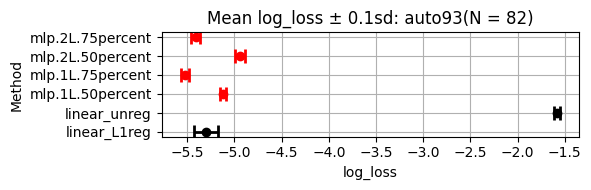

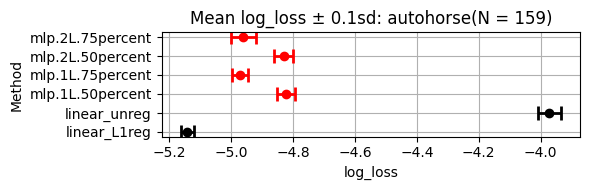

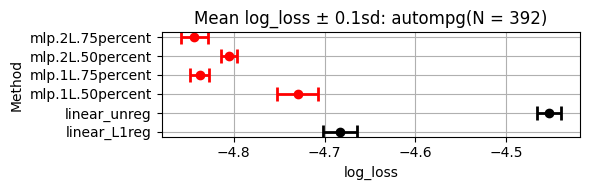

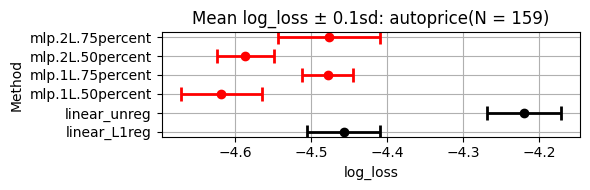

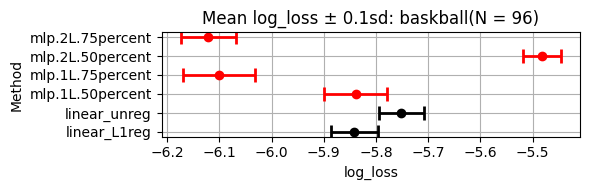

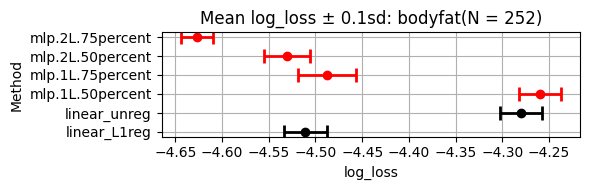

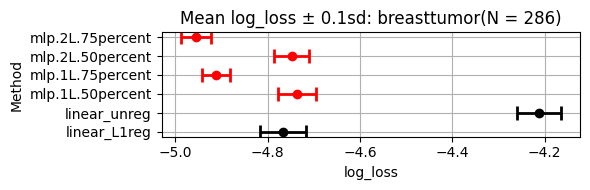

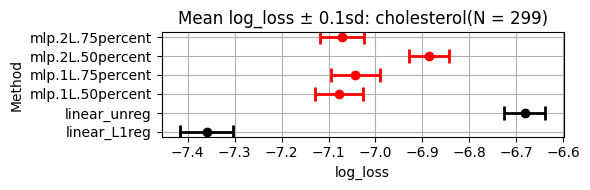

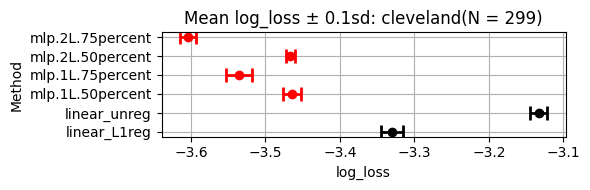

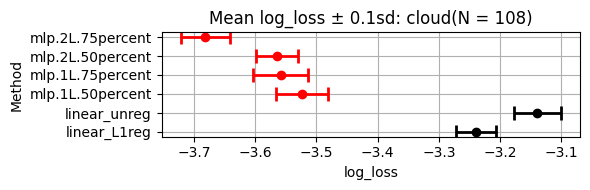

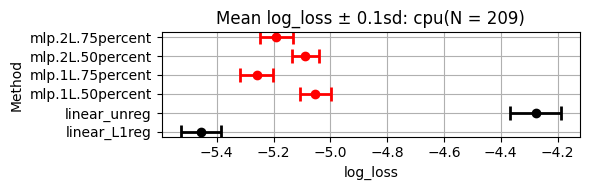

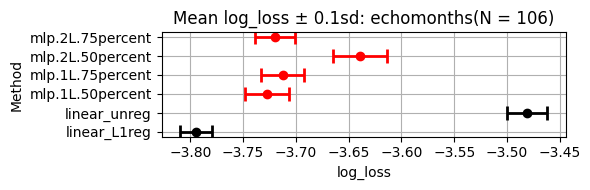

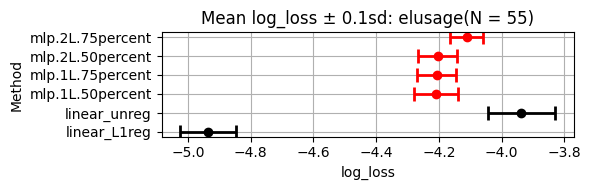

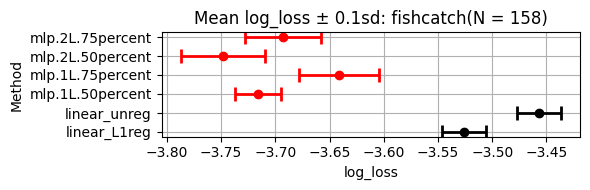

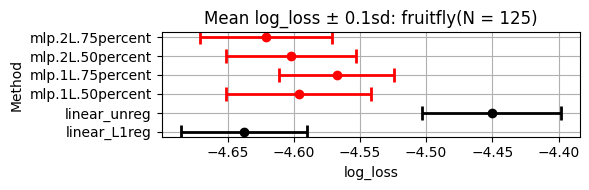

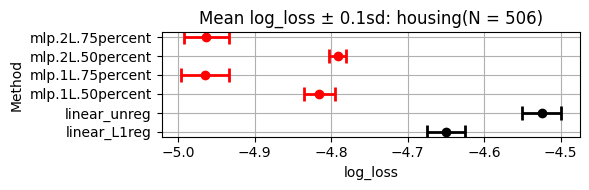

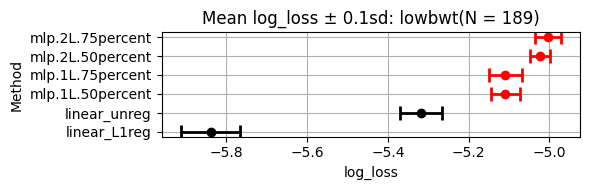

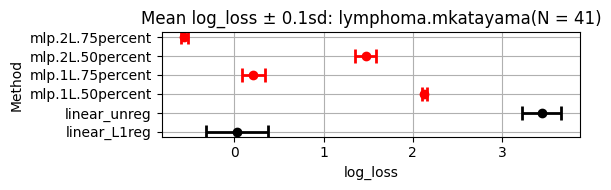

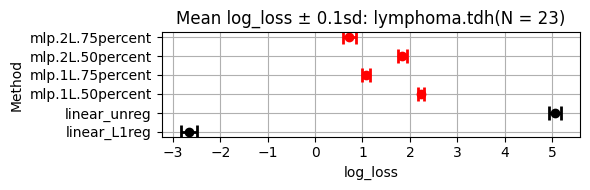

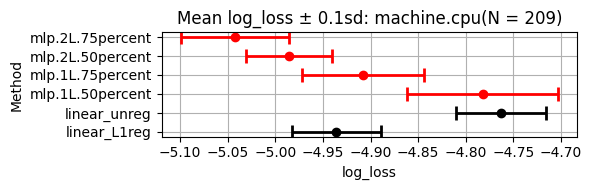

C:\Users\Tung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


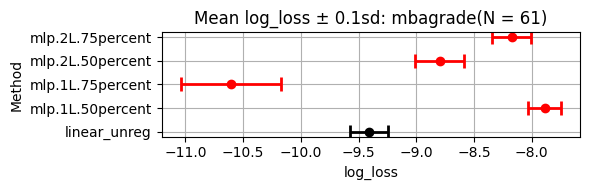

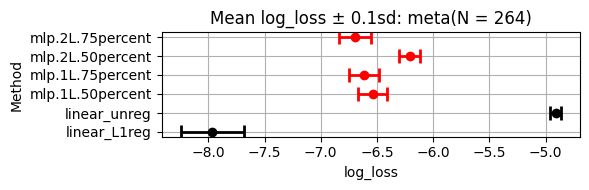

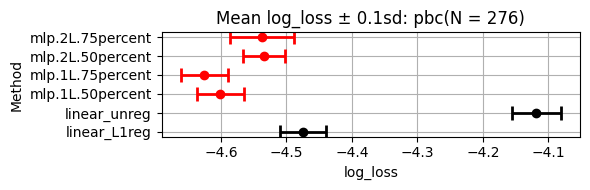

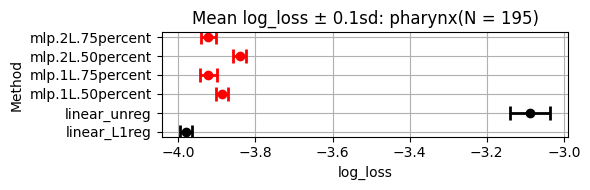

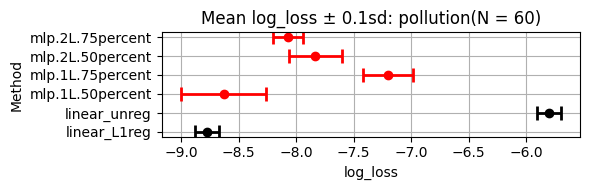

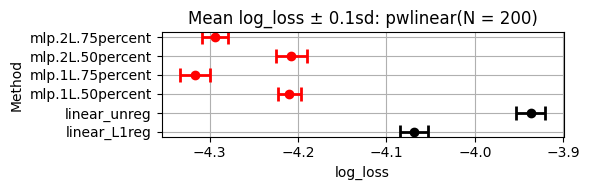

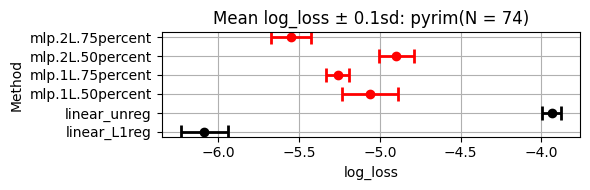

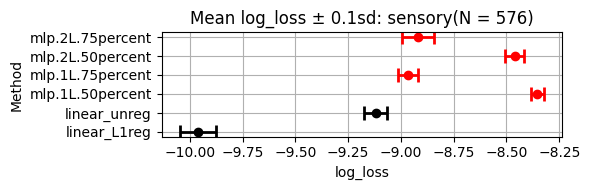

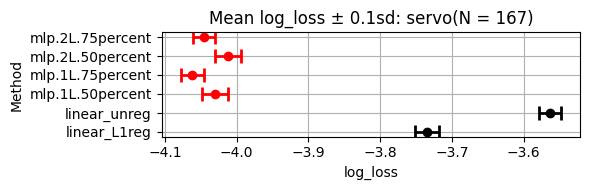

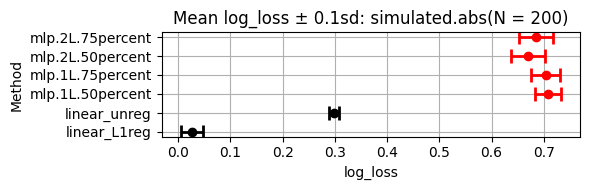

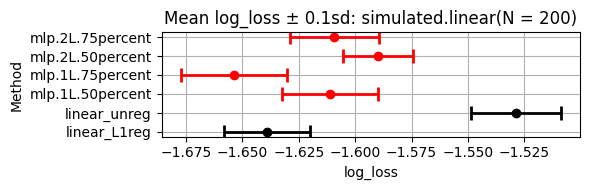

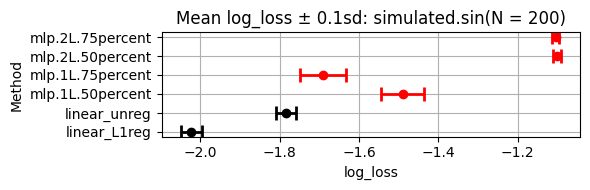

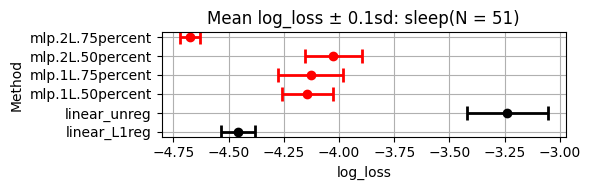

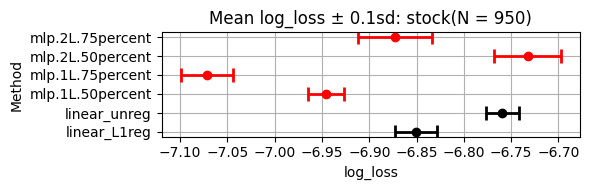

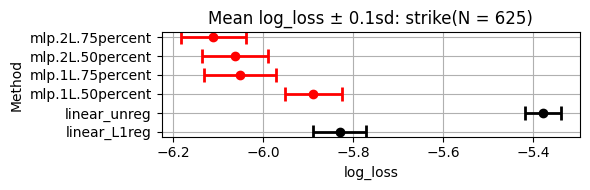

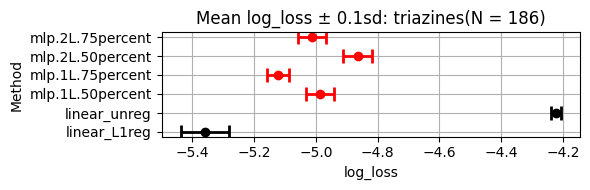

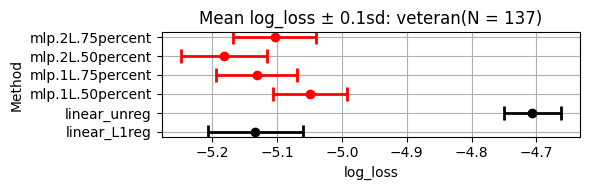

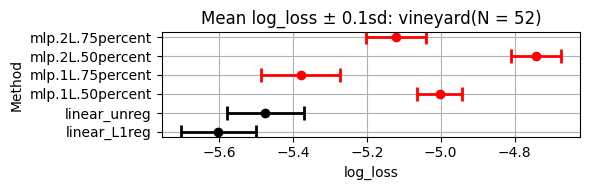

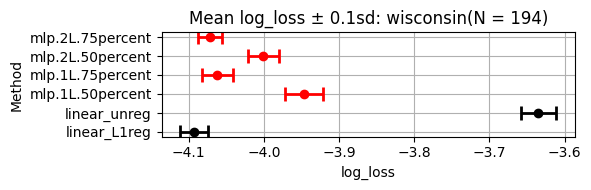

In [10]:
for dataset in datasets:
    plot(dataset)